In [160]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [161]:
# Convolutional Neural Network

# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [162]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range=[0.5,1.0],
                                   horizontal_flip = True,rotation_range=90,brightness_range=[0.2,1.0],width_shift_range=[-200,200])


In [164]:
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('train',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 101 images belonging to 4 classes.
Found 101 images belonging to 4 classes.


In [165]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [166]:
from tensorflow.keras.regularizers import l2

In [167]:
# Part 2 - Building the CNN
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [168]:
## for mulitclassification
cnn.add(Dense(4, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='softmax'))
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [169]:
cnn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 2048)              0         
                                                                 
 dense_18 (Dense)            (None, 128)              

In [170]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 200)

Epoch 1/200
4/4 [==============================] - 10s 3s/step - loss: 1.5233 - accuracy: 0.1089 - val_loss: 1.4121 - val_accuracy: 0.2079
Epoch 2/200
4/4 [==============================] - 8s 2s/step - loss: 1.4483 - accuracy: 0.2475 - val_loss: 1.4031 - val_accuracy: 0.7723
Epoch 3/200
4/4 [==============================] - 8s 2s/step - loss: 1.4180 - accuracy: 0.5149 - val_loss: 1.3990 - val_accuracy: 0.7723
Epoch 4/200
4/4 [==============================] - 9s 2s/step - loss: 1.4021 - accuracy: 0.6436 - val_loss: 1.3949 - val_accuracy: 0.7723
Epoch 5/200
4/4 [==============================] - 10s 3s/step - loss: 1.3949 - accuracy: 0.7228 - val_loss: 1.3908 - val_accuracy: 0.7723
Epoch 6/200
4/4 [==============================] - 9s 2s/step - loss: 1.3894 - accuracy: 0.7723 - val_loss: 1.3868 - val_accuracy: 0.7723
Epoch 7/200
4/4 [==============================] - 9s 2s/step - loss: 1.3855 - accuracy: 0.7723 - val_loss: 1.3829 - val_accuracy: 0.7723
Epoch 8/200
4/4 [===============

Epoch 60/200
4/4 [==============================] - 8s 3s/step - loss: 1.1953 - accuracy: 0.7723 - val_loss: 1.1936 - val_accuracy: 0.7723
Epoch 61/200
4/4 [==============================] - 9s 3s/step - loss: 1.1926 - accuracy: 0.7723 - val_loss: 1.1906 - val_accuracy: 0.7723
Epoch 62/200
4/4 [==============================] - 9s 3s/step - loss: 1.1897 - accuracy: 0.7723 - val_loss: 1.1876 - val_accuracy: 0.7723
Epoch 63/200
4/4 [==============================] - 9s 2s/step - loss: 1.1863 - accuracy: 0.7723 - val_loss: 1.1846 - val_accuracy: 0.7723
Epoch 64/200
4/4 [==============================] - 9s 2s/step - loss: 1.1837 - accuracy: 0.7723 - val_loss: 1.1816 - val_accuracy: 0.7723
Epoch 65/200
4/4 [==============================] - 8s 2s/step - loss: 1.1804 - accuracy: 0.7723 - val_loss: 1.1786 - val_accuracy: 0.7723
Epoch 66/200
4/4 [==============================] - 8s 2s/step - loss: 1.1775 - accuracy: 0.7723 - val_loss: 1.1755 - val_accuracy: 0.7723
Epoch 67/200
4/4 [=========

4/4 [==============================] - 11s 3s/step - loss: 1.0401 - accuracy: 0.7723 - val_loss: 1.0386 - val_accuracy: 0.7723
Epoch 119/200
4/4 [==============================] - 9s 3s/step - loss: 1.0379 - accuracy: 0.7723 - val_loss: 1.0364 - val_accuracy: 0.7723
Epoch 120/200
4/4 [==============================] - 9s 2s/step - loss: 1.0356 - accuracy: 0.7723 - val_loss: 1.0343 - val_accuracy: 0.7723
Epoch 121/200
4/4 [==============================] - 9s 3s/step - loss: 1.0332 - accuracy: 0.7723 - val_loss: 1.0320 - val_accuracy: 0.7723
Epoch 122/200
4/4 [==============================] - 9s 3s/step - loss: 1.0309 - accuracy: 0.7723 - val_loss: 1.0299 - val_accuracy: 0.7723
Epoch 123/200
4/4 [==============================] - 9s 2s/step - loss: 1.0291 - accuracy: 0.7723 - val_loss: 1.0277 - val_accuracy: 0.7723
Epoch 124/200
4/4 [==============================] - 10s 3s/step - loss: 1.0269 - accuracy: 0.7723 - val_loss: 1.0256 - val_accuracy: 0.7723
Epoch 125/200
4/4 [=============

4/4 [==============================] - 9s 3s/step - loss: 0.9357 - accuracy: 0.7723 - val_loss: 0.9348 - val_accuracy: 0.7723
Epoch 177/200
4/4 [==============================] - 9s 3s/step - loss: 0.9344 - accuracy: 0.7723 - val_loss: 0.9333 - val_accuracy: 0.7723
Epoch 178/200
4/4 [==============================] - 9s 2s/step - loss: 0.9330 - accuracy: 0.7723 - val_loss: 0.9320 - val_accuracy: 0.7723
Epoch 179/200
4/4 [==============================] - 9s 3s/step - loss: 0.9314 - accuracy: 0.7723 - val_loss: 0.9306 - val_accuracy: 0.7723
Epoch 180/200
4/4 [==============================] - 8s 2s/step - loss: 0.9303 - accuracy: 0.7723 - val_loss: 0.9293 - val_accuracy: 0.7723
Epoch 181/200
4/4 [==============================] - 8s 2s/step - loss: 0.9288 - accuracy: 0.7723 - val_loss: 0.9278 - val_accuracy: 0.7723
Epoch 182/200
4/4 [==============================] - 8s 2s/step - loss: 0.9272 - accuracy: 0.7723 - val_loss: 0.9264 - val_accuracy: 0.7723
Epoch 183/200
4/4 [===============

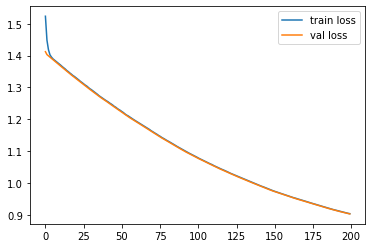

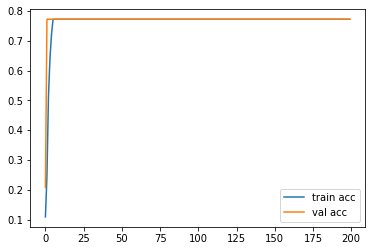

<Figure size 432x288 with 0 Axes>

In [172]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [173]:
#save the model as h5 file
from tensorflow.keras.models import load_model

cnn.save('health_model.h5')

In [174]:
from tensorflow.keras.models import load_model
 
# load model
model = load_model('health_model.h5')

In [175]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 2048)              0         
                                                                 
 dense_18 (Dense)            (None, 128)              

In [176]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('train\X-Ray\image90.jpeg' ,target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

1/1 [==============================] - 0s 163ms/step


In [177]:
result

array([[0.14113404, 0.16261566, 0.5366203 , 0.15963   ]], dtype=float32)